### Taxa de Retorno de Portifólio

#### Bibliotecas

In [1]:
#!pip install pandas_datareader
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
yf.pdr_override()
# definir cesta de ações
tickers = ['VALE3.SA', 'BBAS3.SA', 'PETR4.SA']

mydata = pd.DataFrame()
for t in tickers:
    # definir data inicial (start)
    mydata[t] = pdr.get_data_yahoo(t, start='2013-1-1', progress=False)['Adj Close']
#mydata (apenas ativar se quiser vizualizar os dados carregados)

In [ ]:
# ativar apenas se desejar explorar os dados
#mydata.info()
#mydata.head()
#mydata.tail()

#### Normalização com base 100:

$$
\frac {P_t}{P_0} * 100
$$

In [3]:
mydata.iloc[0]

VALE3.SA    23.996134
BBAS3.SA    12.768085
PETR4.SA     6.423764
Name: 2013-01-02 00:00:00, dtype: float64

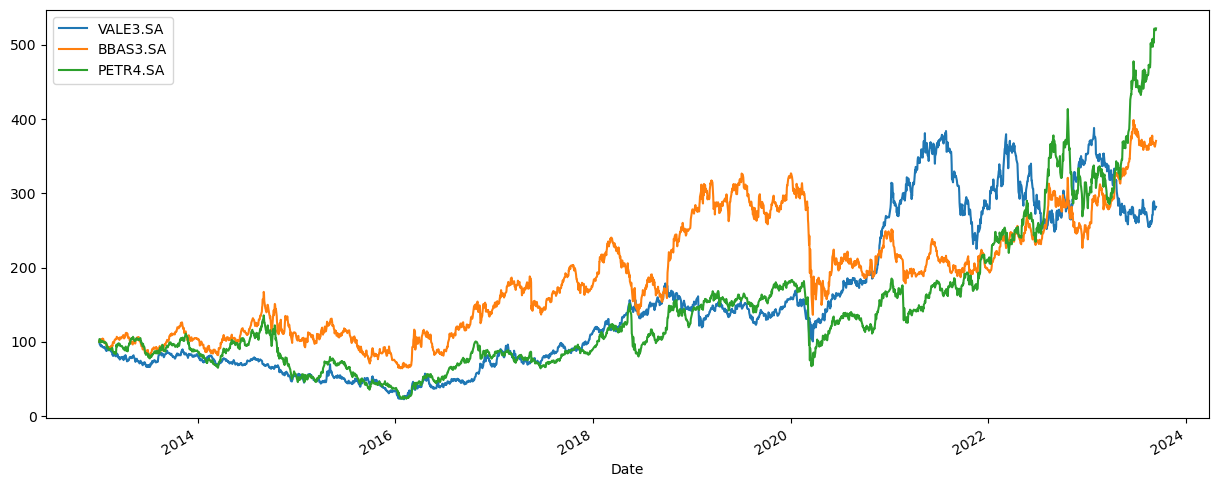

In [4]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

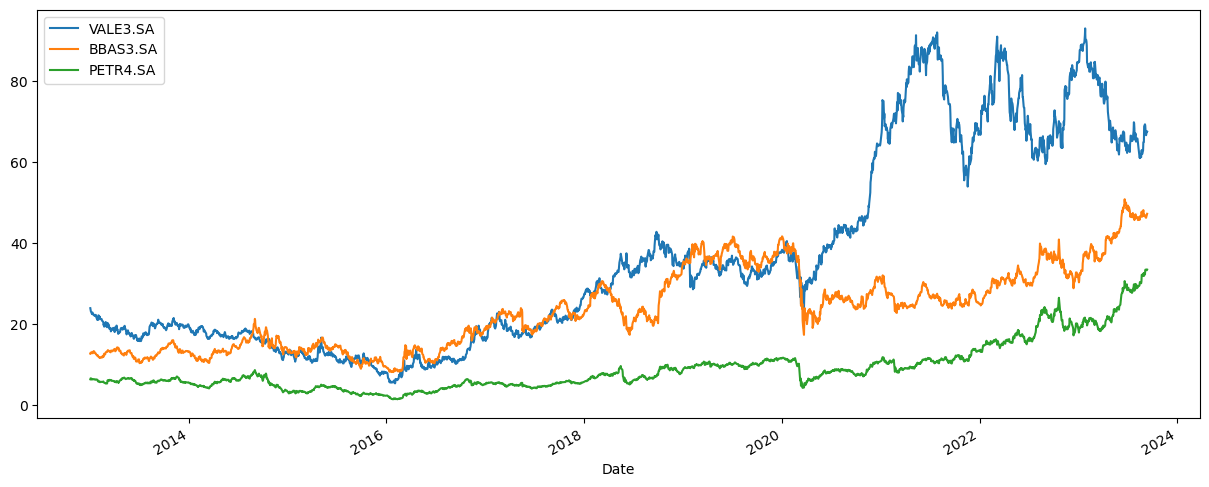

In [5]:
mydata.plot(figsize=(15,6))
plt.show()

In [6]:
# primeiro dia de pregão
mydata.loc['2013-01-02']

VALE3.SA    23.996134
BBAS3.SA    12.768085
PETR4.SA     6.423764
Name: 2013-01-02 00:00:00, dtype: float64

In [7]:
mydata.iloc[0]

VALE3.SA    23.996134
BBAS3.SA    12.768085
PETR4.SA     6.423764
Name: 2013-01-02 00:00:00, dtype: float64

#### Calculando a Taxa de Retorno de um Portifólio de Ações

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,VALE3.SA,BBAS3.SA,PETR4.SA
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,-0.017007,0.019767,0.036059
2013-01-04,-0.015456,-0.012162,0.001470
2013-01-07,-0.019681,0.006155,-0.017131
2013-01-08,-0.007887,0.011472,-0.028884


In [9]:
# definindo os pesos de cada ticker selecinado no portifólio de ações 1
weights = np.array([0.20, 0.25, 0.55])

In [10]:
np.dot(returns, weights)

array([        nan,  0.02137283, -0.00532291, ..., -0.00648241,
        0.00635064,  0.00384013])

In [11]:
annual_returns = returns.mean() * 250
annual_returns

VALE3.SA    0.191545
BBAS3.SA    0.212275
PETR4.SA    0.276222
dtype: float64

In [12]:
np.dot(annual_returns, weights)

0.24330014801959454

In [13]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print (pfolio_1)

24.33 %


In [14]:
# definindo os pesos de cada ticker selecinado no portifólio de ações 2
weights_2 = np.array([0.50, 0.20, 0.30])

In [15]:
# comparando o retorno do portifólio 1 e 2
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print (pfolio_1)
print (pfolio_2)

24.33 %
22.109 %
